In [1]:
import os 
import numpy as np 
import pandas as pd
import warnings
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("loan_prediction.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [4]:
df.shape

(614, 13)

In [5]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
df.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
Loan_ID               0
dtype: int64

It seems that they are having null values

In [7]:
null_cols=df[['Credit_History', 'Self_Employed', 'LoanAmount','Dependents', 'Loan_Amount_Term', 'Gender', 'Married']]

In [8]:
for col in null_cols:
    df[col]=df[col].fillna(df[col].dropna().mode().values[0] ) 

In [9]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.465798,342.410423,0.855049
std,6109.041673,2926.248369,84.180967,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,125.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [11]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Separating catagorical and continuous data types

In [12]:
loan_num=df[df.select_dtypes('number').columns.to_list()]
loan_cat=df[df.select_dtypes('object').columns.to_list()]

In [13]:
loan_num

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,120.0,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0
610,4106,0.0,40.0,180.0,1.0
611,8072,240.0,253.0,360.0,1.0
612,7583,0.0,187.0,360.0,1.0


In [14]:
loan_cat

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y


In [15]:
print(df['Loan_Status'].value_counts())

Y    422
N    192
Name: Loan_Status, dtype: int64


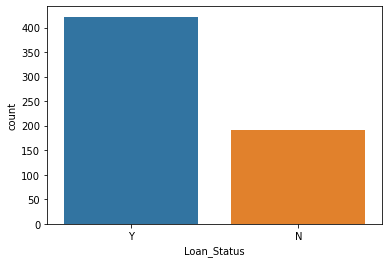

In [16]:
sns.countplot(df['Loan_Status'])

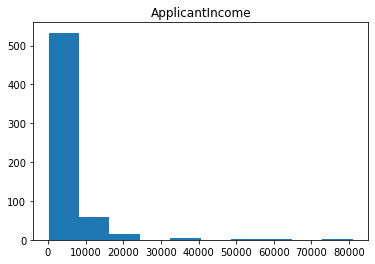

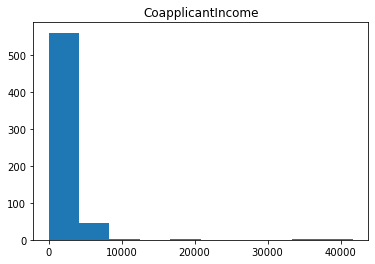

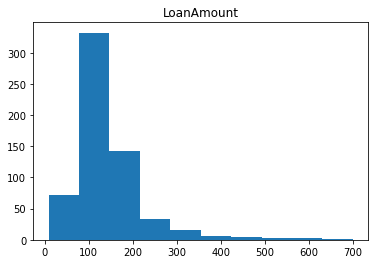

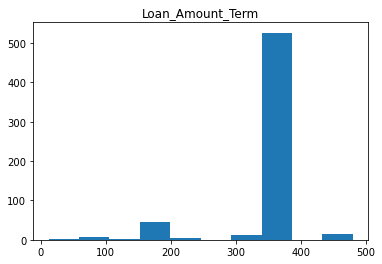

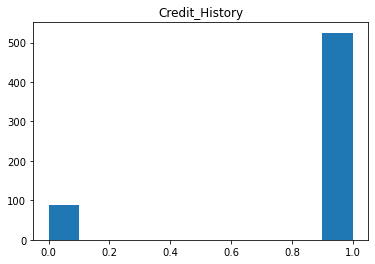

In [17]:
for i in loan_num:
    plt.hist(loan_num[i])
    plt.title(i)
    plt.show()

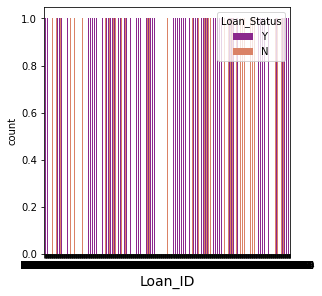

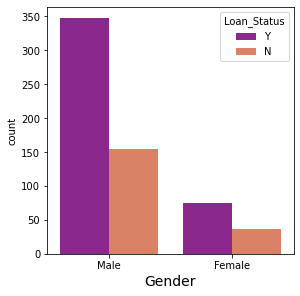

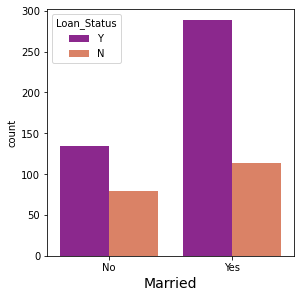

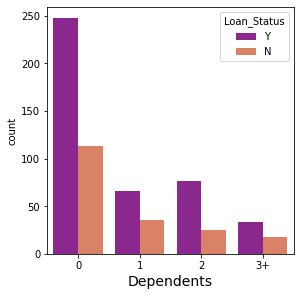

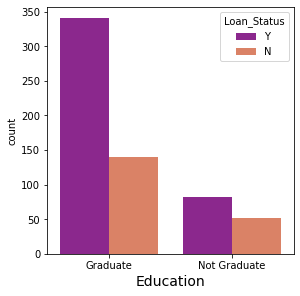

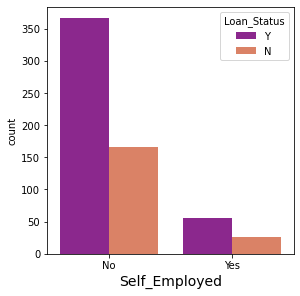

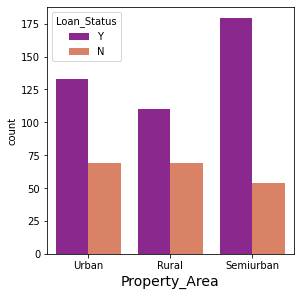

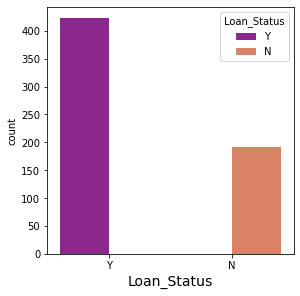

In [18]:
for i in loan_cat: 
    plt.figure(figsize=(15,10))
    plt.subplot(2,3,1)
    sns.countplot(x=i ,hue='Loan_Status', data=df ,palette='plasma')
    plt.xlabel(i, fontsize=14)

In [19]:
#Transform non-numerical into numerical columns
for column in df.columns:
  if df[column].dtype == np.number:
    continue
  df[column] = LabelEncoder().fit_transform(df[column])

In [20]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,376,0.0,120.0,360.0,1.0,2,1
1,1,1,1,1,0,0,306,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,139,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,90,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,381,0.0,141.0,360.0,1.0,2,1


In [21]:
df.corr()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.028029,-0.016013,0.051559,0.039442,0.032874,0.008771,0.039211,0.037369,-0.033028,-0.030603,-0.155416,0.011773
Gender,-0.028029,1.000000,0.364569,0.172914,0.045364,-0.000525,0.074223,0.082912,0.106404,-0.074030,0.009170,-0.025752,0.017987
Married,-0.016013,0.364569,1.000000,0.334216,0.012304,0.004489,0.010497,0.075948,0.146212,-0.100912,0.010938,0.004257,0.091478
Dependents,0.051559,0.172914,0.334216,1.000000,0.055752,0.056798,0.137382,0.030430,0.163017,-0.103864,-0.040160,-0.000244,0.010118
Education,0.039442,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.190873,-0.062290,-0.169436,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,0.032874,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.199142,-0.016100,0.114971,-0.033739,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.008771,0.074223,0.010497,0.137382,-0.190873,0.199142,1.000000,-0.205261,0.496409,-0.027373,0.037980,-0.065143,-0.003123
CoapplicantIncome,0.039211,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.205261,1.000000,0.189723,-0.059383,0.011134,0.010522,-0.059187
LoanAmount,0.037369,0.106404,0.146212,0.163017,-0.169436,0.114971,0.496409,0.189723,1.000000,0.037152,-0.000250,-0.047414,-0.031808
Loan_Amount_Term,-0.033028,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.027373,-0.059383,0.037152,1.000000,-0.004705,-0.076120,-0.022549


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

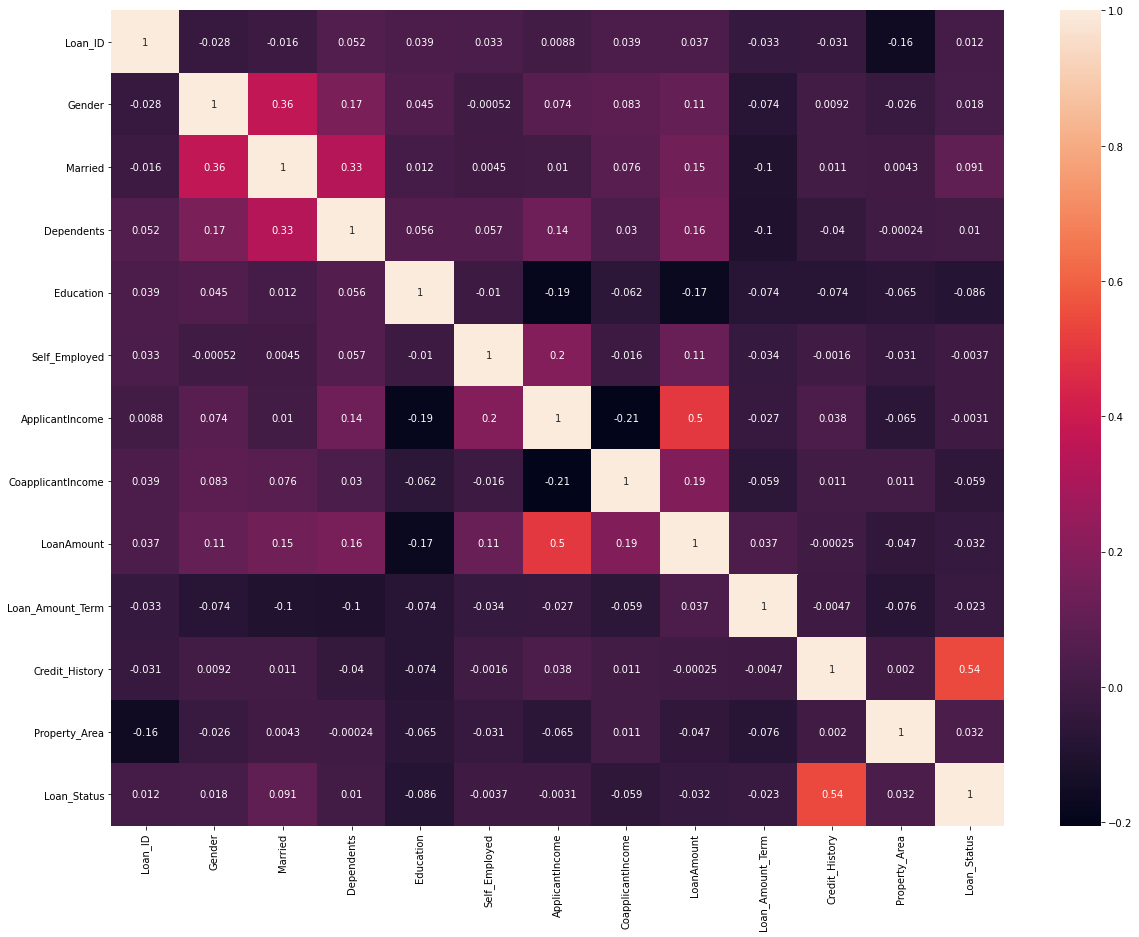

In [22]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)
plt.plot

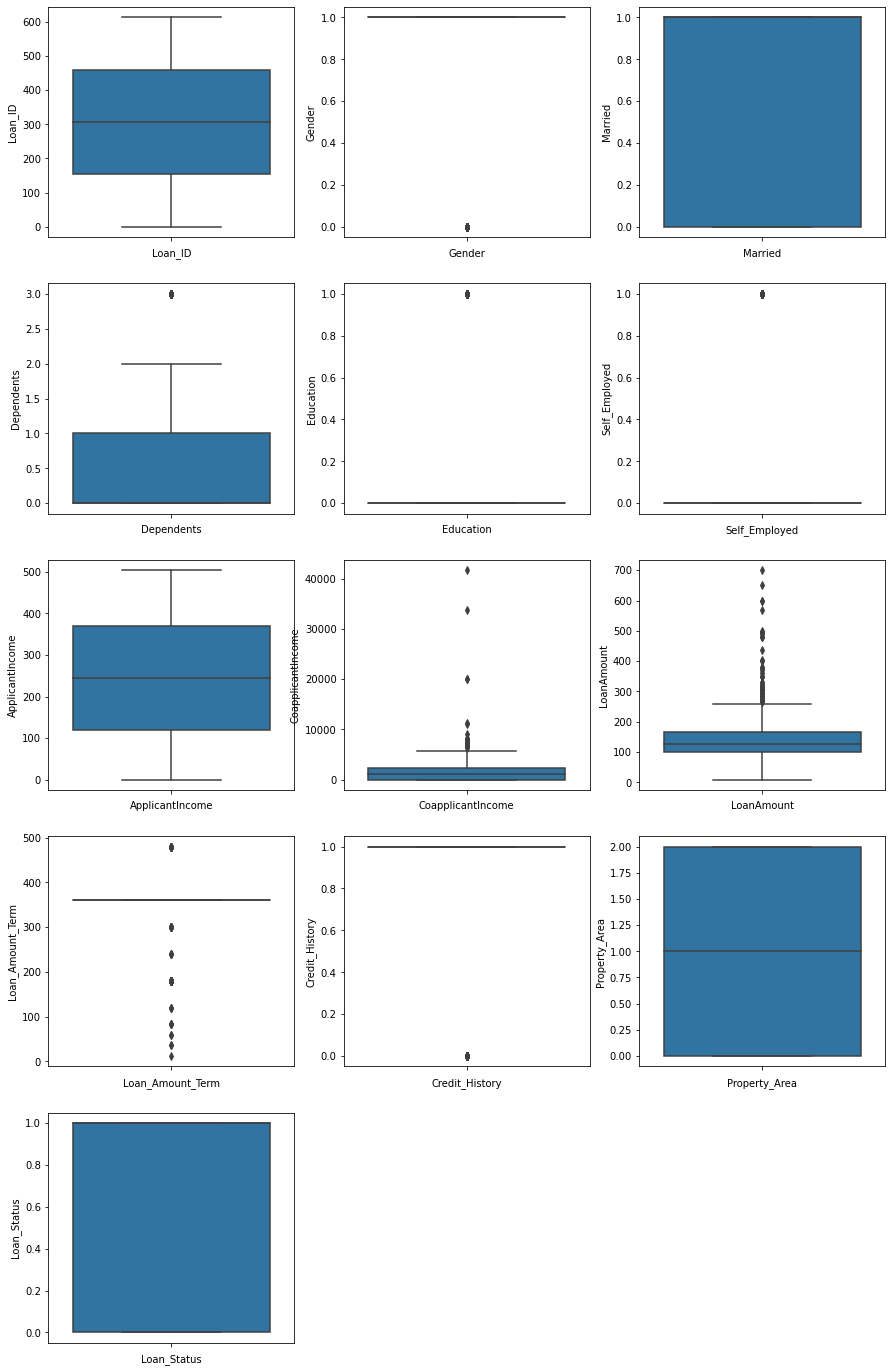

In [23]:
#Visualize the outliers using boxplot
import matplotlib.pyplot as plt
plt.figure(figsize=(15,50))
graph=1
for column in df:
    if graph<=30:
        ax=plt.subplot(10,3,graph)
        sns.boxplot(df[column],orient='v')
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

It seems that there are only few outliers

In [24]:
df.shape

(614, 13)

In [25]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [26]:
#for removing outliers implementing zscore
from scipy.stats import zscore
z_score=zscore(df[['CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']])
abs_z_score=np.abs(z_score)

filtering_entry=(abs_z_score<3).all(axis=1)

df=df[filtering_entry]

In [27]:
df.shape

(582, 13)

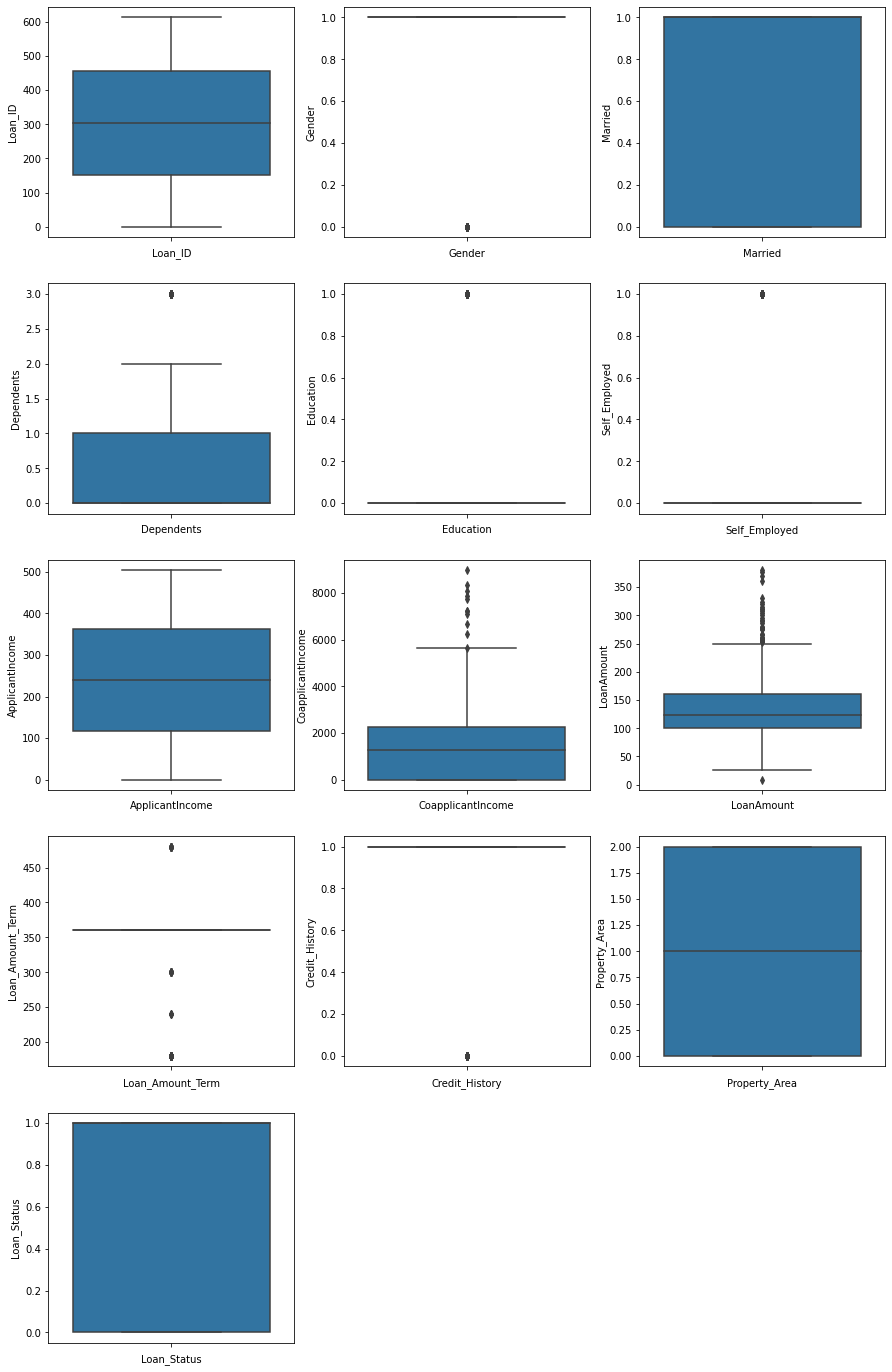

In [28]:
#Visualize the outliers using boxplot
import matplotlib.pyplot as plt
plt.figure(figsize=(15,50))
graph=1
for column in df:
    if graph<=30:
        ax=plt.subplot(10,3,graph)
        sns.boxplot(df[column],orient='v')
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

In [29]:
#for removing outliers implementing zscore
from scipy.stats import zscore
z_score=zscore(df[['CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']])
abs_z_score=np.abs(z_score)

filtering_entry=(abs_z_score<3).all(axis=1)

df=df[filtering_entry]

In [30]:
df.shape

(525, 13)

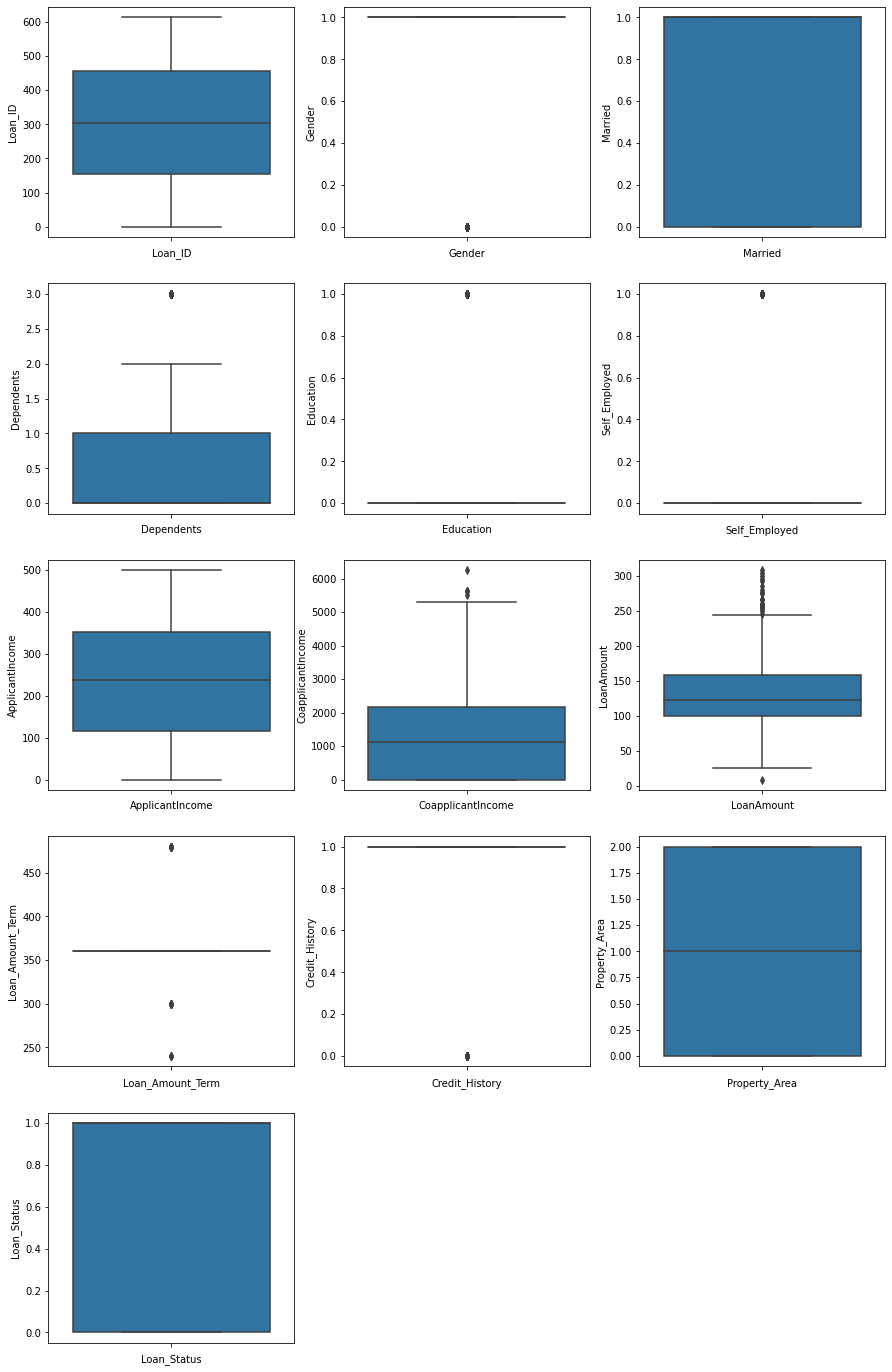

In [31]:
#Visualize the outliers using boxplot
import matplotlib.pyplot as plt
plt.figure(figsize=(15,50))
graph=1
for column in df:
    if graph<=30:
        ax=plt.subplot(10,3,graph)
        sns.boxplot(df[column],orient='v')
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

In [32]:
#for removing outliers implementing zscore
from scipy.stats import zscore
z_score=zscore(df[['CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']])
abs_z_score=np.abs(z_score)

filtering_entry=(abs_z_score<3).all(axis=1)

df=df[filtering_entry]

In [33]:
#for removing outliers implementing zscore
from scipy.stats import zscore
z_score=zscore(df[['CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']])
abs_z_score=np.abs(z_score)

filtering_entry=(abs_z_score<3).all(axis=1)

df=df[filtering_entry]

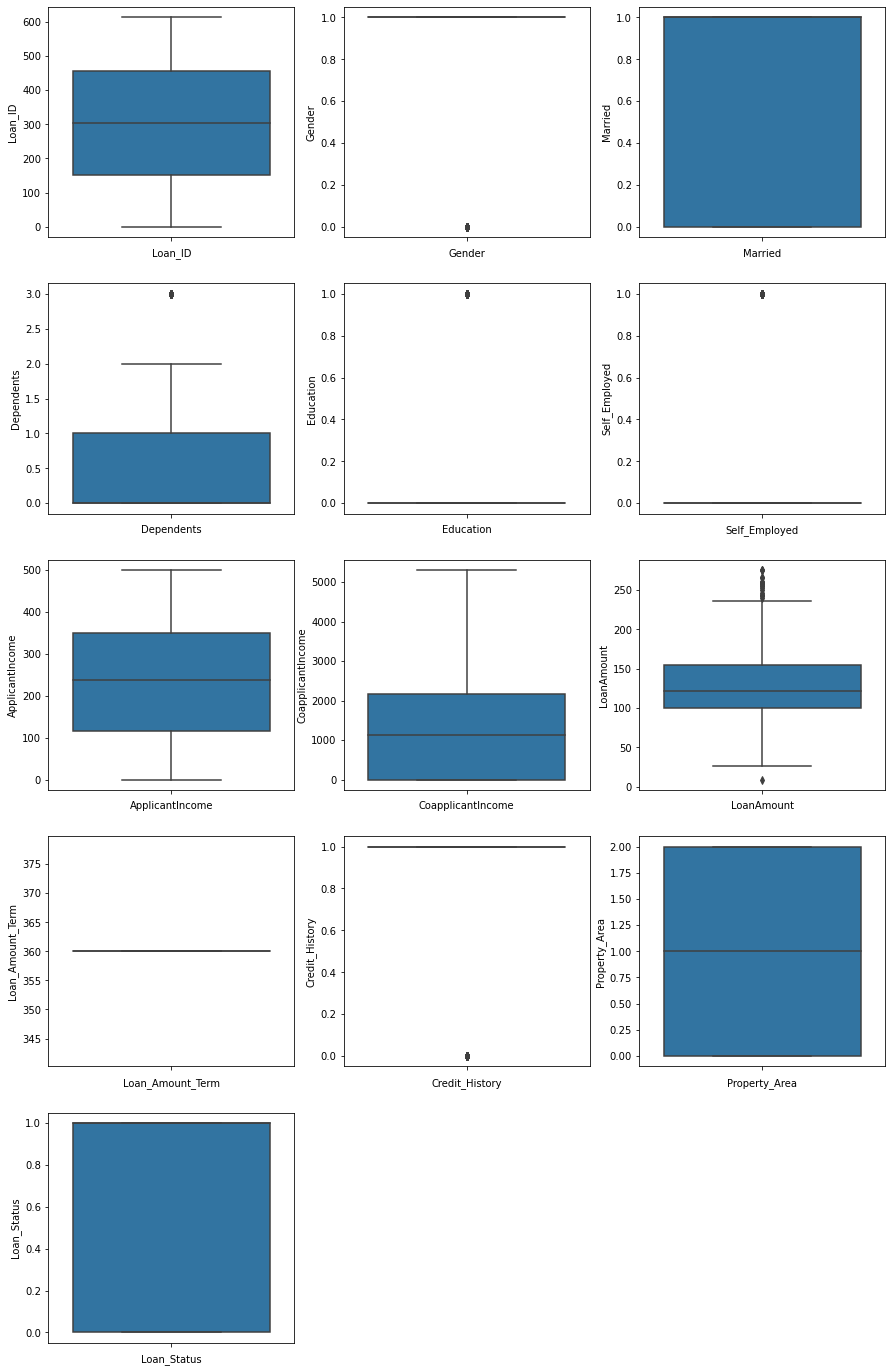

In [34]:
#Visualize the outliers using boxplot
import matplotlib.pyplot as plt
plt.figure(figsize=(15,50))
graph=1
for column in df:
    if graph<=30:
        ax=plt.subplot(10,3,graph)
        sns.boxplot(df[column],orient='v')
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

In [35]:
#for removing outliers implementing zscore
from scipy.stats import zscore
z_score=zscore(df[['LoanAmount','Credit_History']])
abs_z_score=np.abs(z_score)

filtering_entry=(abs_z_score<3).all(axis=1)

df=df[filtering_entry]

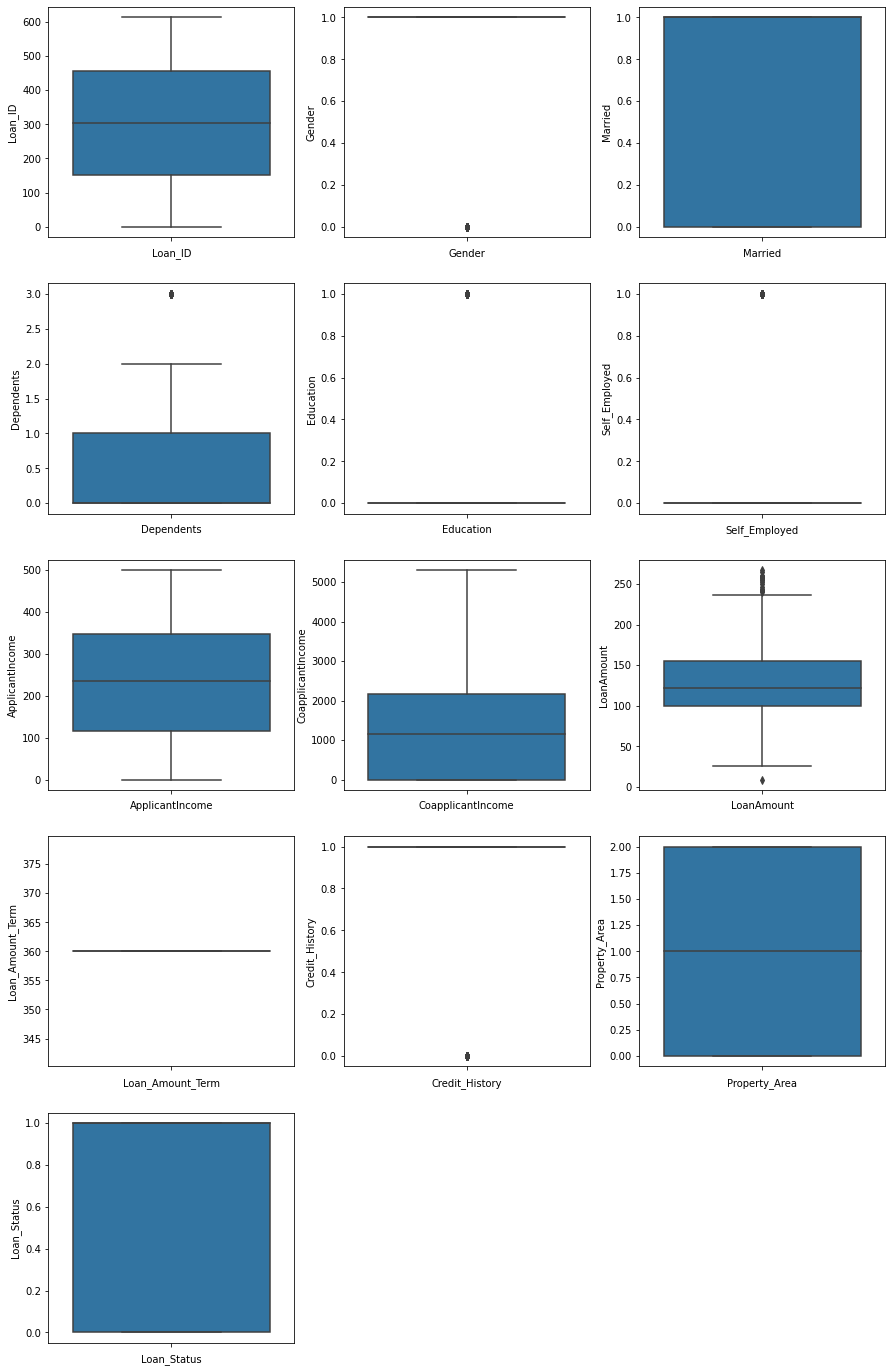

In [36]:
#Visualize the outliers using boxplot
import matplotlib.pyplot as plt
plt.figure(figsize=(15,50))
graph=1
for column in df:
    if graph<=30:
        ax=plt.subplot(10,3,graph)
        sns.boxplot(df[column],orient='v')
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

In [37]:
df.shape

(482, 13)

In [38]:
dataloss=((614-482)/614)*100

In [39]:
dataloss

21.49837133550489

In [40]:
df.skew()

Loan_ID              0.003308
Gender              -1.511206
Married             -0.561929
Dependents           1.112712
Education            1.342091
Self_Employed        2.225448
ApplicantIncome      0.075509
CoapplicantIncome    0.780010
LoanAmount           0.633449
Loan_Amount_Term     0.000000
Credit_History      -2.118870
Property_Area       -0.014502
Loan_Status         -0.903933
dtype: float64

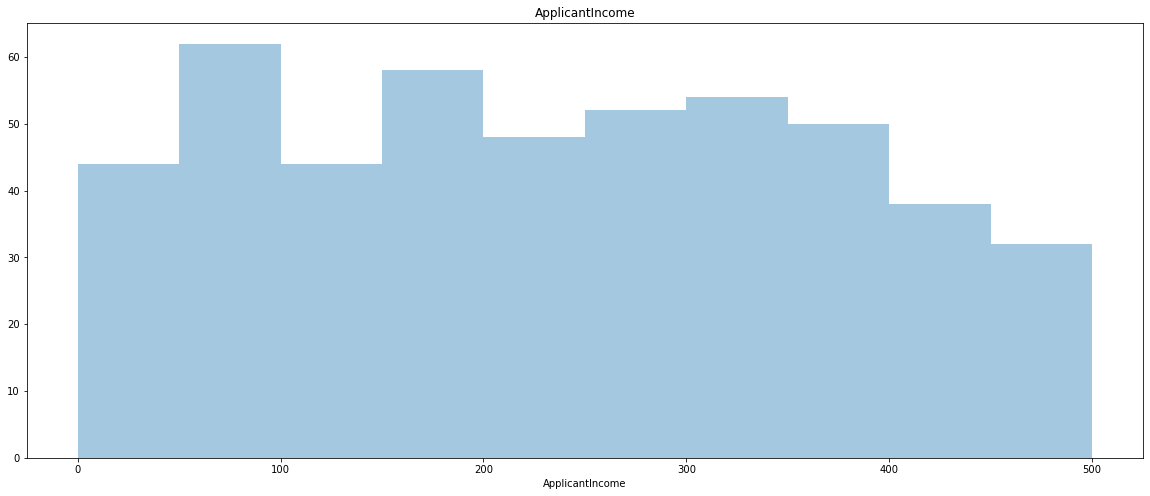

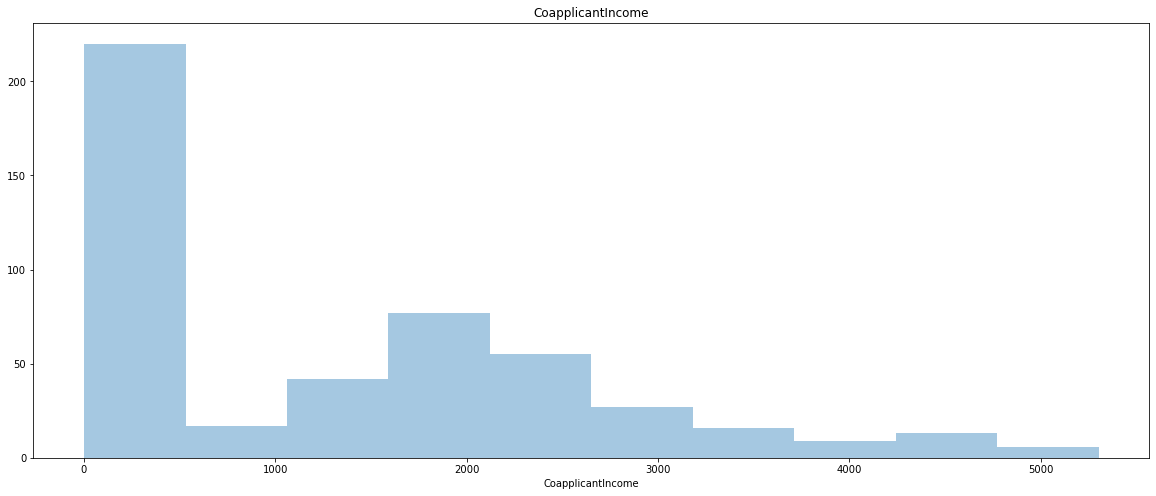

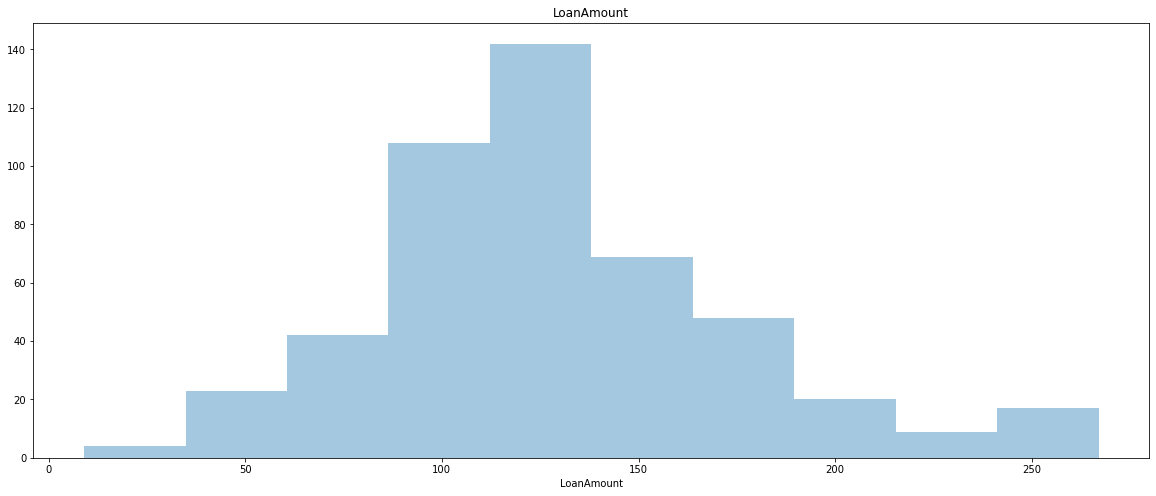

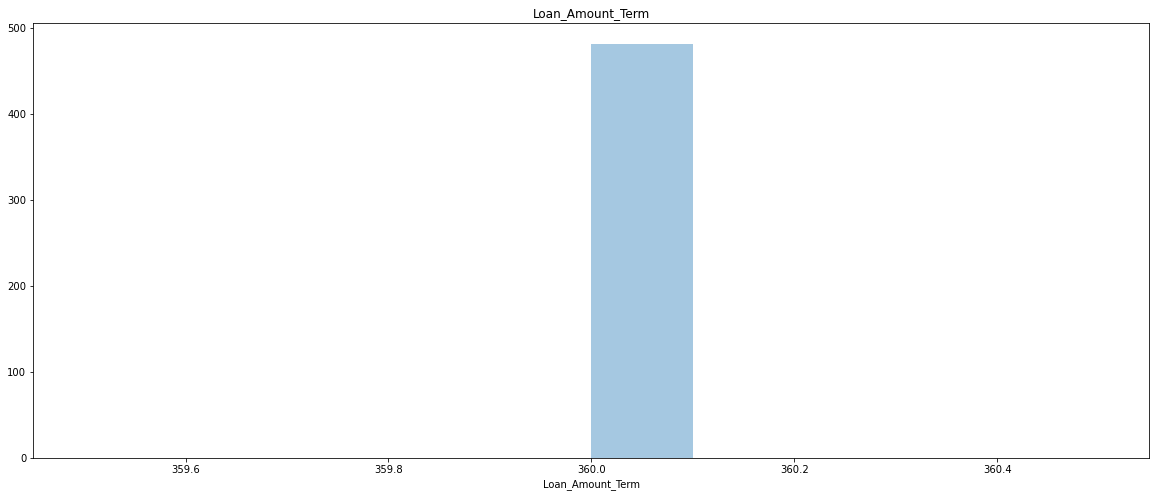

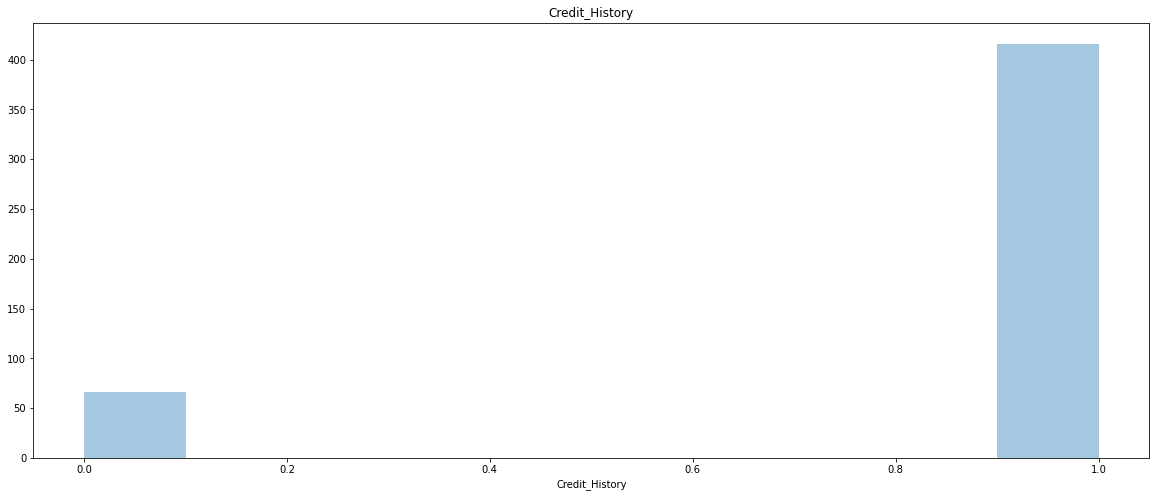

In [41]:
for i in loan_num:                                 
    plt.figure(figsize = (20, 8))
    sns.distplot(a= df[i], bins = 10, kde= False)
    plt.title(i)
    plt.show()

In [42]:
#making the skewness less than or equal to 0.5 for better prediction and to get normal distribution graph
skew=('Gender','Dependents','Education','Self_Employed','CoapplicantIncome','LoanAmount','Credit_History','Loan_Status')
for col in skew:
    if df.skew().loc[col]>0.5:
        df[col]=np.log1p(df[col])

In [43]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [44]:
df=df.drop(columns=['Loan_ID'])

In [45]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [46]:
from sklearn.model_selection import train_test_split
y = df['Loan_Status']
X = df.drop('Loan_Status', axis = 1)


In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [49]:
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [61]:
DT = DecisionTreeClassifier()
RF = RandomForestClassifier()
XGB = XGBClassifier()
LR = LogisticRegression()
models = [DT,RF,XGB,LR]
for i in models:
    print (i)
    i.fit(X_train, y_train)
    pred = i.predict(X_test)
    print (accuracy_score(y_test, pred))
    print (confusion_matrix(y_test, pred))
    print (classification_report(y_test, pred))

DecisionTreeClassifier()
0.7172413793103448
[[23 22]
 [19 81]]
              precision    recall  f1-score   support

           0       0.55      0.51      0.53        45
           1       0.79      0.81      0.80       100

    accuracy                           0.72       145
   macro avg       0.67      0.66      0.66       145
weighted avg       0.71      0.72      0.71       145

RandomForestClassifier()
0.7862068965517242
[[19 26]
 [ 5 95]]
              precision    recall  f1-score   support

           0       0.79      0.42      0.55        45
           1       0.79      0.95      0.86       100

    accuracy                           0.79       145
   macro avg       0.79      0.69      0.71       145
weighted avg       0.79      0.79      0.76       145

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=None,
              importance_t

Credit_History is a very important variable because of its high correlation with Loan_Status therefor showind high Dependancy for the latter.
The Logistic Regression algorithm is the most accurate: approximately 81%.

In [62]:
score = [DT_SC,RF_SC,XGB_SC,LR_SC]
Models = pd.DataFrame({
    'n_neighbors': ["Decision Tree","Random Forest","XGBoost", "Logistic Regression"],
    'Score': score})
Models.sort_values(by='Score', ascending=False)

,n_neighbors,Score
3,Logistic Regression,0.813793
1,Random Forest,0.793103
2,XGBoost,0.758621
0,Decision Tree,0.731034


In [64]:
from sklearn.model_selection import cross_val_score 
for i in models:
    cvs = cross_val_score(i, X, y, cv = 5)
    print ('Cross Validation Score for ',i, ' model is :', cvs.mean())
    print (' ')

Cross Validation Score for  DecisionTreeClassifier()  model is : 0.7304123711340206
 
Cross Validation Score for  RandomForestClassifier()  model is : 0.7947164948453608
 
[21:26:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:26:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:26:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was cha

All models have very low difference between accuracy score and cross val score, hence we will take Logistic Regression has its accuracy is highest.

Hypertuning

In [65]:
from sklearn.model_selection import GridSearchCV

In [67]:
grid_values = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}
lrc = GridSearchCV(LR, param_grid=grid_values)

In [68]:
lrc.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']})

In [69]:
lrc.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [72]:
lrc1=LogisticRegression(  penalty='l2')
lrc1.fit(X_train, y_train)
predlrc1 = lrc1.predict(X_test)
print (accuracy_score(y_test, predlrc1))
print (confusion_matrix(y_test, predlrc1))
print (classification_report(y_test, predlrc1))

0.8137931034482758
[[19 26]
 [ 1 99]]
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        45
           1       0.79      0.99      0.88       100

    accuracy                           0.81       145
   macro avg       0.87      0.71      0.73       145
weighted avg       0.84      0.81      0.79       145



In [73]:
cvs = cross_val_score(lrc1, X, y, cv = 5)
print ('Cross Validation Score for ',lrc1, ' model is :', cvs.mean())

Cross Validation Score for  LogisticRegression()  model is : 0.8258591065292096


In [75]:
import pickle
pickle.dump(lrc1, open('loan_prediction', 'wb'))

In [76]:
# Loading model to compare the results
loaded = pickle.load(open('loan_prediction','rb'))

In [77]:
predlrc1 = lrc1.predict(X_test)

In [78]:
predlrc1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])